In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys(): {}".format(cancer.keys()))

print("Shape of cancer data: {}".format(cancer.data.shape))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)


In [2]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [3]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [8]:
tree = DecisionTreeClassifier(random_state=0, criterion='log_loss')
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=0)

In [9]:
print("Accuracy on training set {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set 1.000
Accuracy on test set 0.944


In [10]:
y_pred = tree.predict(X_test)

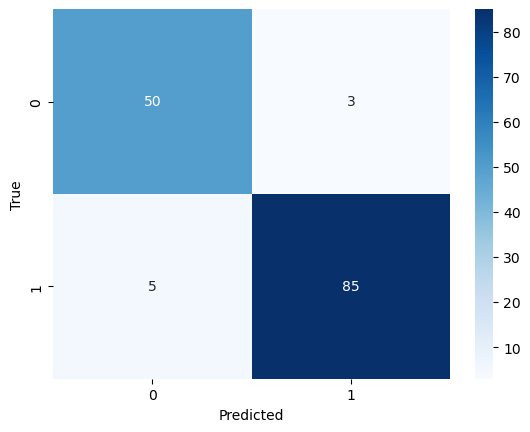

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred2 = clf.predict(X_test)

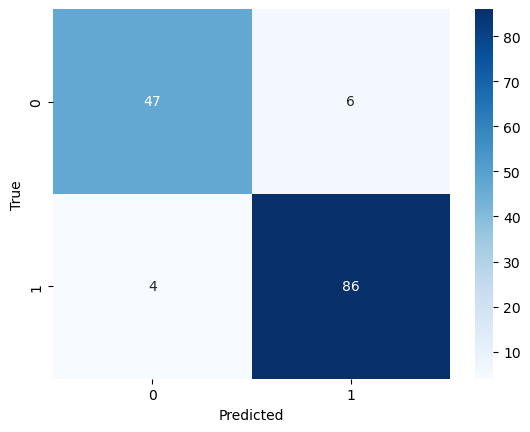

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
print("Accuracy on training set {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(clf.score(X_test, y_test)))
print()
print("Compared with decision tree classifier")
print()
print("Accuracy on training set {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set 0.951
Accuracy on test set 0.930

Compared with decision tree classifier

Accuracy on training set 1.000
Accuracy on test set 0.944


In [16]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.03917292 0.         0.         0.         0.01195657
 0.         0.         0.01488021 0.         0.01972428 0.05809537
 0.         0.         0.         0.01488021 0.         0.
 0.         0.         0.58996697 0.01449514 0.01589587 0.
 0.01517318 0.         0.03931907 0.1664402  0.         0.        ]


# Tasks

a) This shows the importance of each feature, based on gini values. 

(You can change the parameter in code snippet 6 to log_loss or entropy)

b) Completed above

c) Completed above

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import numpy as np



In [18]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

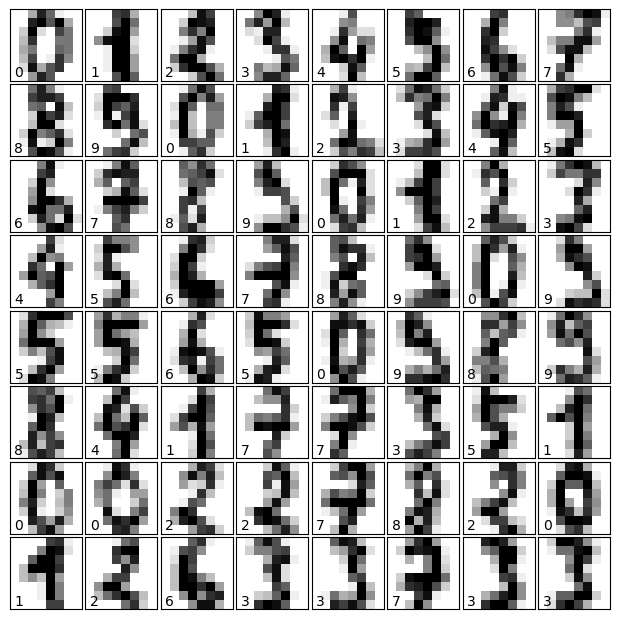

In [19]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("performance report on my DT classifier\n".format(metrics.classification_report(y_pred, y_test)))
print(metrics.classification_report(y_pred, y_test))

performance report on my DT classifier

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.79      0.81      0.80        42
           2       0.80      0.83      0.81        42
           3       0.80      0.75      0.77        48
           4       0.87      0.85      0.86        39
           5       0.90      0.90      0.90        48
           6       0.96      0.98      0.97        51
           7       0.85      0.93      0.89        44
           8       0.83      0.83      0.83        48
           9       0.83      0.75      0.79        52

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("performance report on my Random Forst classifier\n".format(metrics.classification_report(y_pred, y_test)))
print(metrics.classification_report(y_pred, y_test))

performance report on my Random Forst classifier

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        51
           7       1.00      0.98      0.99        49
           8       0.96      0.98      0.97        47
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

